In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the datasets
internet_data = pd.read_csv(r"F:\IIITBangloreAIML\8. Logistic Regression\datasets\internet_data.csv")
customer_data = pd.read_csv(r"F:\IIITBangloreAIML\8. Logistic Regression\datasets\customer_data.csv")
churn_data = pd.read_csv(r"F:\IIITBangloreAIML\8. Logistic Regression\datasets\churn_data.csv")

In [3]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [4]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# merging the dataframes into a single dataframe using customerID column
df1 = pd.merge(internet_data,customer_data,on='customerID',how='inner')

In [7]:
df1.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [8]:
telecom = pd.merge(df1,churn_data,on='customerID',how='inner')

In [9]:
telecom.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No,Female,...,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,Male,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Male,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Female,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# checking the shape of the dataset
telecom.shape

(7043, 21)

In [11]:
# checking the null count
telecom.isnull().sum()

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# checking the dtypes
telecom.dtypes

customerID           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# Handling the TotalCharges Column
telecom['TotalCharges'] = telecom['TotalCharges'].replace(" ",-1)

In [14]:
# dropping below records
telecom[telecom['TotalCharges']==-1]

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,...,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,No,Two year,Yes,Bank transfer (automatic),52.55,-1,No
753,3115-CZMZD,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,No,Yes,0,Yes,Two year,No,Mailed check,20.25,-1,No
936,5709-LVOEQ,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,80.85,-1,No
1082,4367-NUYAO,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,25.75,-1,No
1340,1371-DWPAZ,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,No,Two year,No,Credit card (automatic),56.05,-1,No
3331,7644-OMVMY,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,19.85,-1,No
3826,3213-VVOLG,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,Two year,No,Mailed check,25.35,-1,No
4380,2520-SGTTA,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,20.00,-1,No
5218,2923-ARZLG,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,...,Yes,Yes,0,Yes,One year,Yes,Mailed check,19.70,-1,No
6670,4075-WKNIU,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Female,...,Yes,Yes,0,Yes,Two year,No,Mailed check,73.35,-1,No


In [15]:
telecom = telecom[telecom['TotalCharges']!=-1]

In [16]:
telecom.shape

(7032, 21)

In [17]:
telecom['TotalCharges']= telecom['TotalCharges'].astype('float') 

In [18]:
telecom['TotalCharges'].dtype

dtype('float64')

In [19]:
telecom['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [20]:
# dropping the customerID column since it is not required by the model
telecom.drop(columns = ['customerID'],inplace=True)

<Axes: xlabel='Churn'>

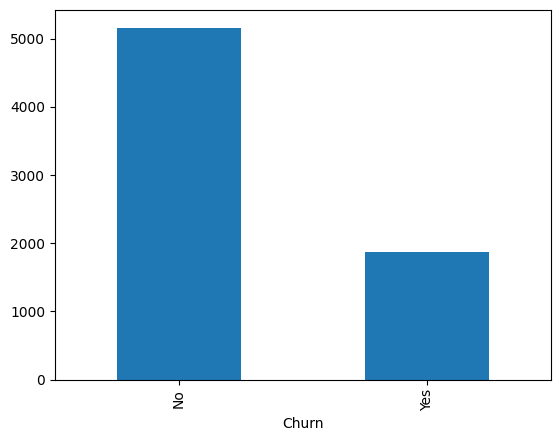

In [21]:
# correcting the churn column
telecom['Churn'].value_counts().plot(kind='bar')

In [22]:
# it is an unbiased dataset 
telecom['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [23]:
telecom['Churn'] = telecom['Churn'].map({'Yes':1,'No':0})

In [24]:
telecom.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [25]:
# Handle Categorical Variables by Creating Dummy Variables and Dropping 'No internet service' Columns

In [26]:
columns_to_process = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport', 'StreamingTV', 'StreamingMovies']

In [27]:
for col in columns_to_process:
    print(col)
    print('--------')
    print(telecom[col].value_counts())
    print('-_-_-') 

MultipleLines
--------
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
-_-_-
OnlineSecurity
--------
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
-_-_-
OnlineBackup
--------
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
-_-_-
DeviceProtection
--------
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
-_-_-
TechSupport
--------
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
-_-_-
StreamingTV
--------
StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64
-_-_-
StreamingMovies
--------
StreamingMovies
No                     2781
Yes                    2

In [28]:
# creating dummy variable for MultipleLines
dummy1 = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')


In [29]:
dummy1.columns

Index(['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes'],
      dtype='object')

In [30]:
dummy1.drop(columns=['MultipleLines_No phone service'],inplace=True)

In [31]:
telecom = pd.concat([telecom,dummy1],axis=1)


In [32]:
telecom.drop(columns=['MultipleLines'],inplace=True)

In [33]:
# creating dummy variable for OnlineSecurity
dummy2 = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')

In [34]:
dummy2.columns

Index(['OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes'],
      dtype='object')

In [35]:
dummy2.drop(columns=['OnlineSecurity_No internet service'],inplace=True)

In [36]:
telecom = pd.concat([telecom,dummy2],axis=1)

In [37]:
telecom.drop(columns=['OnlineSecurity'],inplace=True)

In [38]:
# creating dummy variable for OnlineBackup
dummy3 = pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')

In [39]:
dummy3.columns

Index(['OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes'],
      dtype='object')

In [40]:
dummy3.drop(columns=['OnlineBackup_No internet service'],inplace=True)

In [41]:
telecom = pd.concat([telecom,dummy3],axis=1)

In [42]:
telecom.drop(columns=['OnlineBackup'],inplace=True)

In [43]:
# handling DeviceProtection Column
dummy4 = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')

In [44]:
dummy4.columns

Index(['DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes'],
      dtype='object')

In [45]:
dummy4.drop(columns=['DeviceProtection_No internet service'],inplace=True)

In [46]:
telecom = pd.concat([telecom,dummy4],axis=1)

In [47]:
telecom.drop(columns=['DeviceProtection'],inplace=True)

In [48]:
# Handling TechSupport Column
dummy5 = pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')

In [49]:
dummy5.columns

Index(['TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes'], dtype='object')

In [50]:
dummy5.drop(columns=['TechSupport_No internet service'],inplace=True)

In [51]:
telecom = pd.concat([telecom,dummy5],axis=1)

In [52]:
telecom.drop(columns=['TechSupport'],inplace=True)

In [53]:
# Handling StreamingTV Column
dummy6 = pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')

In [54]:
dummy6.columns

Index(['StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes'], dtype='object')

In [55]:
dummy6.drop(columns=['StreamingTV_No internet service'],inplace=True)

In [56]:
telecom = pd.concat([telecom,dummy6],axis=1)

In [57]:
telecom.drop(columns = ['StreamingTV'],inplace=True)

In [58]:
# Handling StreamingMovies Columns
dummy7 = pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')

In [59]:
dummy7.columns

Index(['StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object')

In [60]:
dummy7.drop(columns=['StreamingMovies_No internet service'],inplace=True)

In [61]:
telecom = pd.concat([telecom,dummy7],axis=1)

In [62]:
telecom.drop(columns = ['StreamingMovies'],inplace=True)

In [63]:
telecom.iloc[:3,:]

,InternetService,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,DSL,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,...,False,True,True,False,True,False,True,False,True,False
1,DSL,Male,0,No,No,34,Yes,One year,No,Mailed check,...,True,False,False,True,True,False,True,False,True,False
2,DSL,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,...,False,True,True,False,True,False,True,False,True,False


In [64]:
boolean_columns = telecom.columns[telecom.dtypes == 'bool']

In [65]:
boolean_columns

Index(['MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [66]:
telecom[boolean_columns] = telecom[boolean_columns].astype('int')

In [67]:
telecom[boolean_columns].head(3)

,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,0,1,0,1,1,0,1,0,1,0,1,0


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# VIF Calculation 
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

In [70]:
# checking the object type columns
object_type_columns = telecom.columns[telecom.dtypes =='object']

In [71]:
object_type_columns

Index(['InternetService', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [72]:
telecom[object_type_columns].head(4)

,InternetService,gender,Partner,Dependents,PhoneService,Contract,PaperlessBilling,PaymentMethod
0,DSL,Female,Yes,No,No,Month-to-month,Yes,Electronic check
1,DSL,Male,No,No,Yes,One year,No,Mailed check
2,DSL,Male,No,No,Yes,Month-to-month,Yes,Mailed check
3,DSL,Male,No,No,No,One year,No,Bank transfer (automatic)


In [73]:
telecom['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [74]:
dummy8 = pd.get_dummies(telecom['InternetService'],prefix='InternetService')

In [75]:
dummy8.columns

Index(['InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [76]:
dummy8.drop(columns=['InternetService_No'],inplace=True)

In [77]:
telecom = pd.concat([telecom,dummy8],axis=1)

In [78]:
telecom.drop(columns=['InternetService'],inplace=True)

In [79]:
dummy9 = pd.get_dummies(telecom['gender'],drop_first = True)

In [80]:
telecom = pd.concat([telecom,dummy9],axis=1)

In [81]:
telecom.drop(columns=['gender'],inplace=True)

In [82]:
dummy10 = pd.get_dummies(telecom['Partner'],prefix='Partner',drop_first=True)

In [83]:
telecom = pd.concat([telecom,dummy10],axis=1)

In [84]:
telecom.drop(columns=['Partner'],inplace=True)

In [85]:
dummy11 = pd.get_dummies(telecom['Dependents'],drop_first=True,prefix='Dependents')

In [86]:
telecom = pd.concat([telecom,dummy11],axis=1)

In [87]:
telecom.drop(columns = ['Dependents'],inplace=True)

In [88]:
dummy12 = pd.get_dummies(telecom['PhoneService'],drop_first=True,prefix='PhoneService')

In [89]:
telecom = pd.concat([telecom,dummy12],axis=1)

In [90]:
telecom.drop(columns = ['PhoneService'],inplace=True)

In [91]:
dummy13 = pd.get_dummies(telecom['Contract'],drop_first=True,prefix='Contract')

In [92]:
telecom = pd.concat([telecom,dummy13],axis=1)

In [93]:
telecom.drop(columns = ['Contract'],inplace=True)

In [94]:
dummy14 = pd.get_dummies(telecom['PaperlessBilling'],drop_first=True,prefix='PaperlessBilling')


In [95]:
telecom = pd.concat([telecom,dummy14],axis=1)

In [96]:
telecom.drop(columns = ['PaperlessBilling'],inplace=True)

In [97]:
telecom.drop(columns=['PaymentMethod'],inplace=True)

In [98]:
telecom.dtypes

SeniorCitizen                    int64
tenure                           int64
MonthlyCharges                 float64
TotalCharges                   float64
Churn                            int64
MultipleLines_No                 int32
MultipleLines_Yes                int32
OnlineSecurity_No                int32
OnlineSecurity_Yes               int32
OnlineBackup_No                  int32
OnlineBackup_Yes                 int32
DeviceProtection_No              int32
DeviceProtection_Yes             int32
TechSupport_No                   int32
TechSupport_Yes                  int32
StreamingTV_No                   int32
StreamingTV_Yes                  int32
StreamingMovies_No               int32
StreamingMovies_Yes              int32
InternetService_DSL               bool
InternetService_Fiber optic       bool
Male                              bool
Partner_Yes                       bool
Dependents_Yes                    bool
PhoneService_Yes                  bool
Contract_One year        

In [99]:
new_bool_cols = telecom.columns[telecom.dtypes=='bool']

In [100]:
new_bool_cols

Index(['InternetService_DSL', 'InternetService_Fiber optic', 'Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes'],
      dtype='object')

In [101]:
telecom[new_bool_cols] = telecom[new_bool_cols].astype('int')

In [102]:
telecom.dtypes

SeniorCitizen                    int64
tenure                           int64
MonthlyCharges                 float64
TotalCharges                   float64
Churn                            int64
MultipleLines_No                 int32
MultipleLines_Yes                int32
OnlineSecurity_No                int32
OnlineSecurity_Yes               int32
OnlineBackup_No                  int32
OnlineBackup_Yes                 int32
DeviceProtection_No              int32
DeviceProtection_Yes             int32
TechSupport_No                   int32
TechSupport_Yes                  int32
StreamingTV_No                   int32
StreamingTV_Yes                  int32
StreamingMovies_No               int32
StreamingMovies_Yes              int32
InternetService_DSL              int32
InternetService_Fiber optic      int32
Male                             int32
Partner_Yes                      int32
Dependents_Yes                   int32
PhoneService_Yes                 int32
Contract_One year        

In [103]:
# checking VIF

In [104]:
X = telecom.drop(columns=['Churn'])

In [105]:
vif = calculate_vif(X)

C:\Users\arshm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [106]:
vif

,Feature,VIF
0,SeniorCitizen,1.368620
1,tenure,15.920494
2,MonthlyCharges,4883.465083
3,TotalCharges,16.979809
4,MultipleLines_No,inf
5,MultipleLines_Yes,inf
6,OnlineSecurity_No,inf
7,OnlineSecurity_Yes,inf
8,OnlineBackup_No,inf
9,OnlineBackup_Yes,inf


In [107]:
# there is a very high collineraity in dataset
X = X.drop(columns=[
    'MultipleLines_No', 
    'OnlineSecurity_No', 
    'OnlineBackup_No', 
    'DeviceProtection_No', 
    'TechSupport_No', 
    'StreamingTV_No', 
    'StreamingMovies_No', 
    'InternetService_DSL'
])

In [108]:
vif = calculate_vif(X)

In [109]:
vif

,Feature,VIF
0,SeniorCitizen,1.368568
1,tenure,15.865867
2,MonthlyCharges,82.710887
3,TotalCharges,16.872397
4,MultipleLines_Yes,2.662469
5,OnlineSecurity_Yes,2.508173
6,OnlineBackup_Yes,2.653261
7,DeviceProtection_Yes,2.726550
8,TechSupport_Yes,2.565748
9,StreamingTV_Yes,3.762105


Check for High VIF Values:<br />
The loop runs while the maximum VIF value in the dataset (vif['VIF'].max()) is greater than 5.<br/>

A VIF > 5 typically indicates multicollinearity (although stricter thresholds like 10 are sometimes used).<br/>
Identify the Feature with the Highest VIF:<br/>
Drop the Problematic Feature:<br/>
recalculating vif

In [110]:
while vif['VIF'].max() > 5:
    drop_feature = vif.loc[vif['VIF'].idxmax(), 'Feature']
    X = X.drop(columns=[drop_feature])
    vif = calculate_vif(X)
print("Final VIF Values:\n", vif)

Final VIF Values:
                         Feature       VIF
0                 SeniorCitizen  1.346388
1             MultipleLines_Yes  2.270473
2            OnlineSecurity_Yes  1.734918
3              OnlineBackup_Yes  1.919239
4          DeviceProtection_Yes  2.150160
5               TechSupport_Yes  1.909145
6               StreamingTV_Yes  2.589724
7           StreamingMovies_Yes  2.613679
8   InternetService_Fiber optic  3.036906
9                          Male  1.880554
10                  Partner_Yes  2.682492
11               Dependents_Yes  1.941276
12             PhoneService_Yes  4.929896
13            Contract_One year  1.575448
14            Contract_Two year  1.983457
15         PaperlessBilling_Yes  2.652435


In [111]:
# Recursive Feature Elimination

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [113]:
y = telecom['Churn']


In [114]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [115]:
selected_features = X.columns[rfe.support_]
X = X[selected_features]

In [116]:
X.head()

,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,InternetService_Fiber optic,Partner_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,1,0,0
2,1,1,0,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,1


In [117]:
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'InternetService_Fiber optic', 'Partner_Yes',
       'PhoneService_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes'],
      dtype='object')


In [118]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
# GLM Model Training
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
glm_results = glm_model.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2150.1
Date:                Sun, 09 Feb 2025   Deviance:                       4300.2
Time:                        16:12:23   Pearson chi2:                 4.92e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2474
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [120]:
y_pred_proba = glm_results.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("\nOptimal Threshold:", optimal_threshold)


Optimal Threshold: 0.29917637911579353


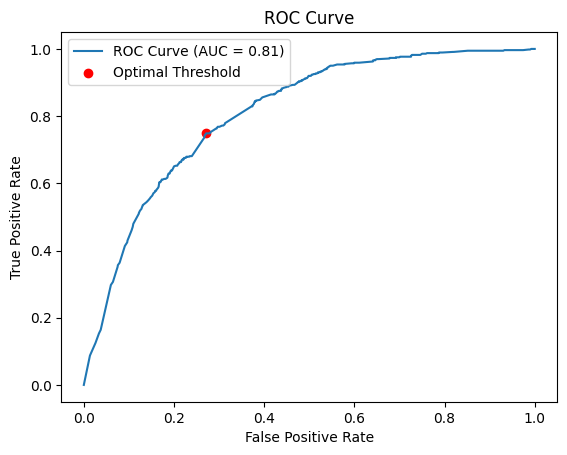

In [121]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label="Optimal Threshold")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

TPR - FPR is a metric that balances the benefits of correctly classifying positives (high TPR) with the cost of falsely classifying negatives as positives (low FPR).
A higher value of tpr - fpr indicates a better trade-off between TPR and FPR.
The optimal threshold is chosen where tpr - fpr is maximized, as this represents the point where the classifier performs best in distinguishing between the two classes.


tpr - fpr is a NumPy array calculated for each threshold in the roc_curve function.
np.argmax(tpr - fpr) identifies the index of the maximum value of tpr - fpr.
This index corresponds to the optimal threshold in the thresholds array, which balances sensitivity and specificity.


Confusion Matrix:
 [[1129  420]
 [ 141  420]]


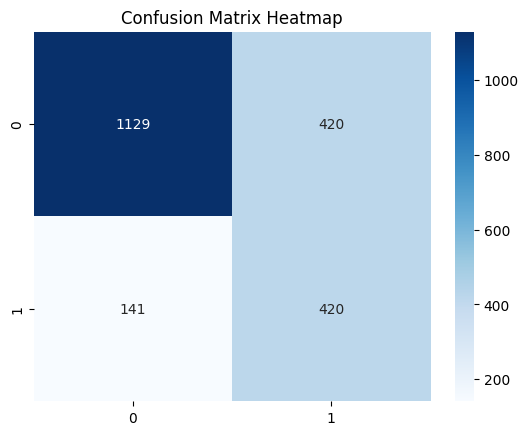

In [122]:
#Predictions and Evaluation
y_pred = (y_pred_proba >= optimal_threshold).astype(int)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [123]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1549
           1       0.50      0.75      0.60       561

    accuracy                           0.73      2110
   macro avg       0.69      0.74      0.70      2110
weighted avg       0.79      0.73      0.75      2110


ROC AUC Score: 0.81
